<a href="https://colab.research.google.com/github/ArnobAhmed99/Arnob_Ahmed_2211351042_CSE445/blob/main/Mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

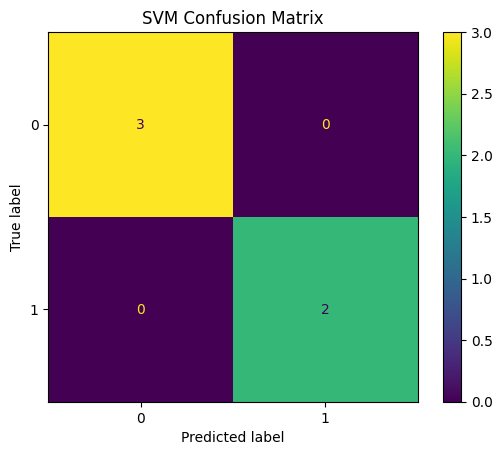

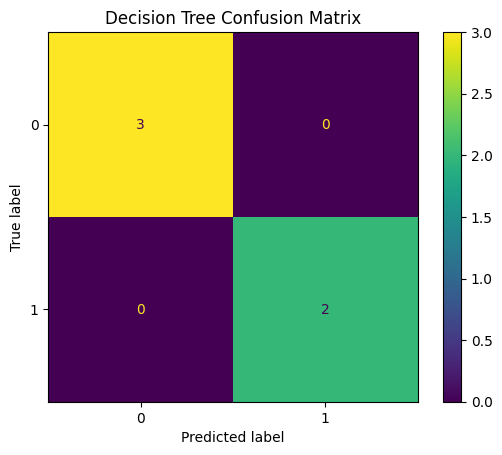

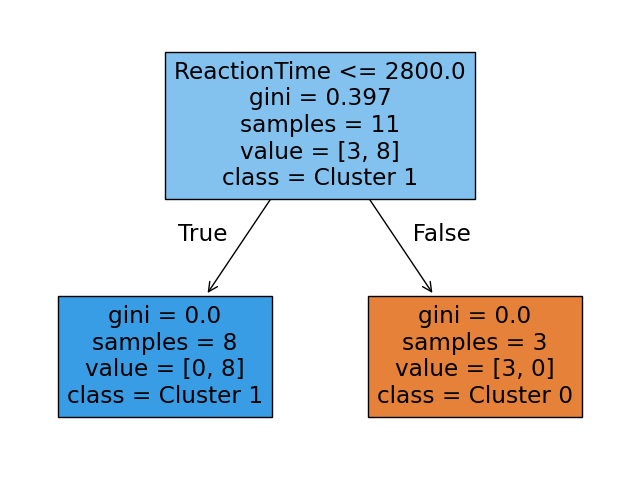

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. ডেটা লোড
df = pd.read_excel("stroop_test_data.xlsx")

# 2. K-means দিয়ে লেবেল বানানো
features = df[['Accuracy(%)', 'ReactionTime']]
kmeans = KMeans(n_clusters=2, random_state=42)
df['ClusterLabel'] = kmeans.fit_predict(features)

# 3. ডেটা ভাগ করা
X_train, X_test, y_train, y_test = train_test_split(features, df['ClusterLabel'], test_size=0.3, random_state=42)

# 4. SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# 5. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 6. Confusion Matrix SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title("SVM Confusion Matrix")
plt.show()

# 7. Confusion Matrix Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# 8. Decision Tree ভিজ্যুয়াল
plt.figure(figsize=(8,6))
plot_tree(dt, feature_names=['Accuracy','ReactionTime'], class_names=['Cluster 0','Cluster 1'], filled=True)
plt.show()